In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 432x216 with 0 Axes>

In [2]:
import logging
from numbers import Integral

import numpy as np

from matplotlib import rcParams
from matplotlib import backends, docstring, projections
from matplotlib import __version__ as _mpl_version
from matplotlib import get_backend

import matplotlib.artist as martist
from matplotlib.artist import Artist, allow_rasterization
from matplotlib.backend_bases import FigureCanvasBase
import matplotlib.cbook as cbook
import matplotlib.colorbar as cbar
import matplotlib.image as mimage

from matplotlib.axes import Axes, SubplotBase, subplot_class_factory
from matplotlib.blocking_input import BlockingMouseInput, BlockingKeyMouseInput
from matplotlib.gridspec import GridSpec
import matplotlib.legend as mlegend
from matplotlib.patches import Rectangle
from matplotlib.projections import (get_projection_names,
                                    process_projection_requirements)
from matplotlib.text import Text, TextWithDash
from matplotlib.transforms import (Affine2D, Bbox, BboxTransformTo,
                                   TransformedBbox)
import matplotlib._layoutbox as layoutbox
from matplotlib.backend_bases import NonGuiException

In [3]:
t1 = pd.read_table("C:\\Users\\RAMKUMAR\\Desktop\\Train.txt",delimiter = ",")
t1

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [4]:
t1.to_csv("t1.csv")

In [5]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
0           125972 non-null int64
tcp         125972 non-null object
ftp_data    125972 non-null object
SF          125972 non-null object
491         125972 non-null int64
0.1         125972 non-null int64
0.2         125972 non-null int64
0.3         125972 non-null int64
0.4         125972 non-null int64
0.5         125972 non-null int64
0.6         125972 non-null int64
0.7         125972 non-null int64
0.8         125972 non-null int64
0.9         125972 non-null int64
0.10        125972 non-null int64
0.11        125972 non-null int64
0.12        125972 non-null int64
0.13        125972 non-null int64
0.14        125972 non-null int64
0.15        125972 non-null int64
0.16        125972 non-null int64
0.17        125972 non-null int64
2           125972 non-null int64
2.1         125972 non-null int64
0.00        125972 non-null float64
0.00.1      125972 non-null float6

In [6]:
t2 = t1.rename(columns={"0" :"duration","tcp":"protocol_type","ftp_data":"service","SF":"flag","491":"src_bytes",
                              "0.1":"dst_bytes","0.2":"land","0.3":"wrong_fragment","0.4":"urgent","0.5":"hot","0.6":"num_failed_logins",
                             "0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell","0.10":"su_attempted","0.11":"num_root",
                             "0.12":"num_file_creations","0.13":"num_shells","0.14":"num_access_files","0.15":"num_outbound_cmds",
                             "0.16":"is_host_login","0.17":"is_guest_login","2":"count","2.1":"srv_count","0.00":"serror_rate",
                              "0.00.1":"srv_serror_rate","0.00.2":"rerror_rate","0.00.3":"srv_rerror_rate","1.00":"same_srv_rate",
                             "0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate","150":"dst_host_count","25":"dst_host_srv_count",
                             "0.17.1":"dst_host_same_srv_rate","0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate",
                             "0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate","0.00.8":"dst_host_srv_serror_rate",
                           "0.05":"dst_host_rerror_rate", "0.00.9":"dst_host_srv_rerror_rate","normal":"attack","20":"last_flag"})

t2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [7]:
test1 = pd.read_table("C:\\Users\\RAMKUMAR\\Desktop\\Test.txt",delimiter = ",")
test1

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [8]:
test2 = test1.rename(columns = {"0":"duration","tcp":"protocol_type","private":"service","REJ":"flag","0.1":"src_bytes",
 "0.2":"dst_bytes","0.3":"land","0.4": "wrong_fragment","0.5":"urgent","0.6":"hot","0.7":"num_failed_logins","0.8":"logged_in",
 "0.9": "num_compromised","0.10":"root_shell","0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations", 
 "0.14":"num_shells","0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login",
 "229":"count","10":"srv_count","0.00":"serror_rate", "0.00.1":"srv_serror_rate", "1.00":"rerror_rate",
 "1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06": "diff_srv_rate","0.00.2":"srv_diff_host_rate","255":"dst_host_count",
 "10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate", "0.06.1":"dst_host_diff_srv_rate",
 "0.00.3":"dst_host_same_src_port_rate","0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate",
 "0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate",
 "neptune":"attack","21":"last_flag"})
test2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [9]:
test2.drop_duplicates(subset=['duration']) 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
13,37,tcp,telnet,SF,773,364200,0,0,0,0,...,0.16,0.05,0.03,0.04,0.00,0.77,0.00,0.07,normal,14
29,805,tcp,http,RSTR,76944,1,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.07,0.07,apache2,14
36,8,tcp,ftp,SF,220,688,0,0,0,4,...,0.51,0.08,0.02,0.00,0.00,0.00,0.00,0.00,buffer_overflow,1
53,282,tcp,ftp,SF,160,599,0,0,0,2,...,0.15,0.02,0.00,0.00,0.00,0.00,0.44,0.00,warezmaster,13
57,7428,tcp,telnet,SF,0,44,0,0,0,0,...,0.85,0.03,0.00,0.00,0.33,0.39,0.12,0.06,processtable,18
59,4,tcp,pop_3,SF,28,93,0,0,0,0,...,0.98,0.02,0.00,0.00,0.00,0.00,0.00,0.00,guess_passwd,18
60,280,tcp,ftp_data,SF,283618,0,0,0,0,0,...,0.86,0.29,0.86,0.20,0.00,0.00,0.00,0.00,warezmaster,9


In [10]:
t2 = t2.merge(test2.drop_duplicates(subset=['duration']), how='left')
t2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [11]:
mapping ={'back':'attack','land':'attack','neptune':'attack','pod':'attack','smurf':'attack','teardrop':'attack','apache2':'attack', 'udpstorm':'attack','processtable':'attack','worm':'attack','satan':'attack','ipsweep':'attack','nmap':'attack','portsweep':'attack','mscan':'attack','saint':'attack','guess_passwd':'attack','ftp_write':'attack','imap':'attack','phf':'attack','multihop':'attack','warezmaster':'attack','warezclient':'attack','spy':'attack',
'xlock':'attack','xsnoop':'attack','snmpguess':'attack','snmpgetattack':'attack','httptunnel':'attack','sendmail':'attack','named':'attack','buffer_overflow':'attack','loadmodule':'attack','rootkit':'attack','perl':'attack','sqlattack':'attack','xterm':'attack','ps':'attack'}


t2['y']=t2['attack'].replace(mapping)
t2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,attack
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,attack
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,attack
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,attack
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,attack
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,attack


In [12]:
t2.to_csv("t2.csv")

In [13]:
t3 = t2.assign(attack = t2.y)
t3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19,attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack


In [14]:
t3['y1']=pd.factorize(t3['attack'],sort = True)[0]
t3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y,y1
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,19,attack,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,1
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,1
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack,0
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,0
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,0
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack,0


In [15]:
mapping ={1:'yes',0:'no'}


t3['y1']=t3['y1'].replace(mapping)
t3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y,y1
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,yes
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,19,attack,no
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,yes
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,yes
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack,no
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,no
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,no
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,no
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,attack,no
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,attack,no


In [16]:
t3.to_csv("t3.csv")

In [17]:
t4 = t3.drop(['y'],axis =1)
t4

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y1
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,yes
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19,no
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,yes
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,yes
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,no
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,no
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,no
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,no
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,attack,21,no
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,attack,21,no


In [18]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125972 entries, 0 to 125971
Data columns (total 44 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [19]:
t4.protocol_type.value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [20]:
t4.service.value_counts()

http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6859
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
               ...  
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbios_ns       347
ssh              311
kshell           299
nntp             296
pop_3            264
sql_net          245
IRC              187
ntp_u            168
rje               86
pop_2        

In [21]:
t4.flag.value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [22]:
t4.y1.value_counts()

yes    67342
no     58630
Name: y1, dtype: int64

In [23]:
t4.to_csv("t4.csv")

In [24]:
t4.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [25]:
t4.describe().T.to_csv("t4.describe().T.csv")

In [26]:
pandas_profiling.ProfileReport(t4)

Number of variables,44
Number of observations,125972
Total Missing (%),0.0%
Total size in memory,43.2 MiB
Average record size in memory,360.0 B
Numeric,26
Categorical,5
Boolean,5
Date,0
Text (Unique),0
Rejected,8


# Exporting pandas profiling output to html file

In [27]:
ramkumar1 = pandas_profiling.ProfileReport(t4)

In [28]:
ramkumar1.to_file(outputfile='pandas_profilingramkumar1.html')

# Basic Exploratory Analysis

In [29]:
#["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [30]:
t4_attack = pd.DataFrame( t4.attack.value_counts() )
t4_attack

,attack
normal,67342
attack,58630


In [31]:
attack_count = t4[['attack','y1']].groupby(['attack','y1']).size().reset_index()
attack_count.columns = ['attack','y1','count']

In [32]:
attack_count

,attack,y1,count
0,attack,no,58630
1,normal,yes,67342


In [33]:
attack_count = t4[['attack','y1']].groupby(['attack','y1']).size()
attack_percent = attack_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [34]:
attack_percent

,attack,y1,0
0,attack,no,1.0
1,normal,yes,1.0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

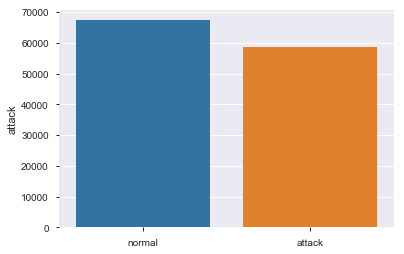

In [36]:
sns.barplot( t4_attack.index, t4_attack.attack )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


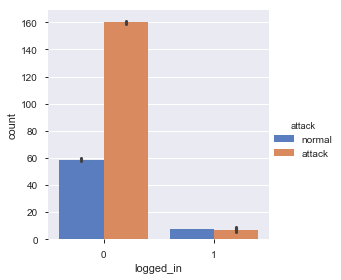

In [37]:
logged_in_count = t4[['logged_in', 'attack']].groupby(['logged_in', 'attack']).size().reset_index()
logged_in_count.columns = ['logged_in', 'attack', 'count']

sns.factorplot(x="logged_in", y = 'count', hue="attack", data=t4,
               size=4, kind="bar", palette="muted")

In [38]:
logged_in_count = t4[['logged_in', 'attack']].groupby(['logged_in', 'attack']).size()
logged_in_percent = logged_in_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [39]:
logged_in_percent.columns = ['logged_in', 'attack', 'percent']

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


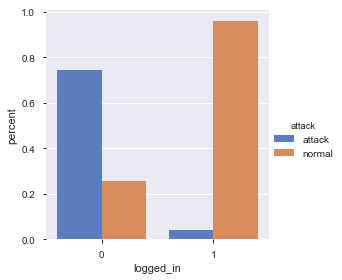

In [40]:
sns.factorplot(x="logged_in", y = 'percent', hue="attack", data=logged_in_percent,
               size=4, kind="bar", palette="muted")

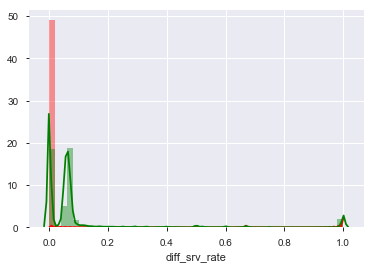

In [41]:
sns.distplot( t4[t4.logged_in == 1]['diff_srv_rate'], color = 'r')
sns.distplot( t4[t4.logged_in == 0]['diff_srv_rate'], color = 'g')

# identifying relationships (between Y & numerical independent variables by comparing means)

In [42]:
t4.groupby('y1').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
y1,,,,,,,,,,,,,,,,,,,,,
no,423.320689,82820.141327,37524.482159,0.000307,0.048746,0.000068,0.174262,0.001040,0.034027,0.017568,...,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008,18.571550
yes,168.589899,13133.467064,4329.749517,0.000104,0.000000,0.000148,0.230658,0.001381,0.710656,0.507083,...,190.288215,0.811885,0.040134,0.121725,0.025996,0.013930,0.006117,0.046589,0.044699,20.315925


In [43]:
numeric_var_names=[key for key in dict(t4.dtypes) if dict(t4.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(t4.dtypes) if dict(t4.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
['protocol_type', 'service', 'flag', 'attack', 'y1']


In [44]:
t4_num=t4[numeric_var_names]
t4_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21
3,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21


In [45]:
t4_num.to_csv("t4_num.csv")

In [46]:
t4_cat = t4[cat_var_names]
t4_cat.head()

,protocol_type,service,flag,attack,y1
0,udp,other,SF,normal,yes
1,tcp,private,S0,attack,no
2,tcp,http,SF,normal,yes
3,tcp,http,SF,normal,yes
4,tcp,private,REJ,attack,no


In [47]:
t4_cat.to_csv("t4_cat.csv")

# Creating Data audit Report

In [48]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary1=t4_num.apply(lambda x: var_summary(x)).T

In [49]:
num_summary1.T

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
N,1.259720e+05,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,1.259720e+05
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SUM,3.617247e+07,5.740179e+09,2.491634e+09,25.000000,2858.000000,14.000000,25750.000000,154.000000,49852.000000,35178.000000,...,1.456913e+07,65662.210000,10449.570000,18691.560000,4099.470000,35833.330000,35081.530000,14969.550000,15146.980000,2.456965e+06
MEAN,2.871469e+02,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,1.156537e+02,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,1.950406e+01
MEDIAN,0.000000e+00,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.300000e+01,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+01
STD,2.604526e+03,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,1.107029e+02,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512e+00
VAR,6.783553e+06,3.446106e+13,1.617073e+13,0.000198,0.064278,0.000206,4.622401,0.002047,0.239131,573.225937,...,1.225513e+04,0.201556,0.035692,0.095480,0.012671,0.197834,0.198622,0.093978,0.102055,5.251025e+00
MIN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
P1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000e+01
P5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+01


In [50]:
num_summary1.T.to_csv("num_summary1.T.csv")

In [51]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

t4_num=t4_num.apply(lambda x: outlier_capping(x))

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [52]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

t4_num=t4_num.apply(lambda x: Missing_imputation(x))

In [53]:
t4_num.head().T

,0,1,2,3,4
duration,0.00,0.00,0.00,0.00,0.00
src_bytes,146.00,0.00,232.00,199.00,0.00
dst_bytes,0.00,0.00,8153.00,420.00,0.00
land,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00
num_failed_logins,0.00,0.00,0.00,0.00,0.00
logged_in,0.00,0.00,1.00,1.00,0.00
num_compromised,0.00,0.00,0.00,0.00,0.00


In [54]:
t4_num.to_csv("t4_num.csv")

In [55]:
t4_num.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.135982,-0.139505,0.323505,0.276602,-0.034260,-0.078252,-0.077955,0.150304,0.171099,-0.146935
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,0.000055,0.068032,-0.036771,0.017300,-0.030135,-0.099585,-0.099963,-0.045251,-0.047174,-0.244251
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,0.323253,0.311321,-0.131370,-0.080879,-0.015250,-0.208832,-0.208731,-0.120731,-0.109381,0.098952
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,0.021274,0.379973,0.127002,NaN,NaN,NaN,1.000000,NaN,0.168937,0.423630,...,-0.039058,0.013809,-0.028852,-0.038697,-0.034279,-0.085733,-0.085295,-0.035994,-0.037023,-0.242288
num_failed_logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logged_in,-0.064538,0.163275,0.421999,NaN,NaN,NaN,0.168937,NaN,1.000000,0.125493,...,0.624363,0.604056,-0.256067,-0.160994,-0.052834,-0.491484,-0.493270,-0.275974,-0.272809,0.307474
num_compromised,0.062081,0.603363,0.237363,NaN,NaN,NaN,0.423630,NaN,0.125493,1.000000,...,-0.004396,0.059499,-0.027771,-0.034179,-0.016599,-0.046813,-0.050796,-0.022847,-0.020501,-0.278755


In [56]:
t4_num.corr().to_csv("t4_num.corr().csv")

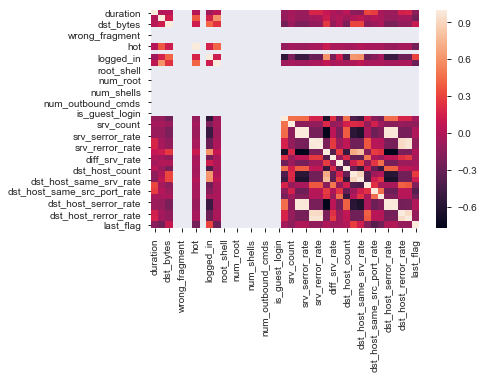

In [57]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(t4_num.corr())

In [58]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=t4_cat.apply(cat_summary)

In [59]:
cat_summary

,protocol_type,service,flag,attack,y1
N,125972,125972,125972,125972,125972
NMISS,0,0,0,0,0
ColumnsNames,tcp 102688 udp 14993 icmp 8291 N...,http 40338 private 21853 doma...,SF 74944 S0 34851 REJ 1123...,"normal 67342 attack 58630 Name: attack, ...","yes 67342 no 58630 Name: y1, dtype: int64"


In [60]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [61]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack', 'y1']

In [62]:
#for c_feature in categorical_features
t4_cat_new = t4_cat
for c_feature in cat_var_names:
    t4_cat_new[c_feature] = t4_cat_new[c_feature].astype('category')
    t4_cat_new = create_dummies(t4_cat_new , c_feature )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
t4_cat_new.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_normal,y1_yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
t4_cat_new.to_csv("t4_cat_new.csv")

In [65]:
t4_new = pd.concat([t4_num, t4_cat_new], axis=1)

In [66]:
t4_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_normal,y1_yes
0,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
t4_new.to_csv("t4_new.csv")

In [68]:
t4_new.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'attack_normal', 'y1_yes'],
      dtype='object', length=122)

# Feature Selection
Dropping columns based on data audit report
    - Based on low variance (near zero variance)
    - High missings (>25% missings)
    - High correlations between two numerical variables

In [69]:
# num_outbound_cmds,is_host_login,land,urgent,num_shells,root_shell,su_attempted,num_failed_logins,is_guest_login,num_access_files,dst_host_srv_diff_host_rate,diff_srv_rate,dst_host_diff_srv_rate,wrong_fragment,srv_diff_host_rate,dst_host_rerror_rate,dst_host_same_src_port_rate


In [70]:
t5_new = t4_new.drop(['num_outbound_cmds','is_host_login','land','urgent','num_shells','root_shell','su_attempted',
'num_failed_logins','is_guest_login','num_access_files','dst_host_srv_diff_host_rate','diff_srv_rate',
'dst_host_diff_srv_rate','wrong_fragment','srv_diff_host_rate','dst_host_rerror_rate','dst_host_same_src_port_rate',
'dst_bytes','dst_host_same_srv_rate','dst_host_srv_serror_rate','num_outbound_cmds','dst_host_serror_rate',
'duration','num_root','srv_rerror_rate','hot','srv_serror_rate','dst_host_srv_rerror_rate','rerror_rate','num_compromised',
'same_srv_rate','serror_rate','num_file_creations','src_bytes','attack_normal'], axis=1)
t5_new

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,y1_yes
0,0,13,1,255,1,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,123,6,255,26,19,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,5,30,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,30,32,255,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,121,19,255,19,21,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,166,9,255,9,21,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,117,16,255,15,21,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,270,23,255,23,21,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,133,8,255,13,21,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,205,12,255,12,21,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
t5_new.to_csv("t5_new.csv")

In [72]:
t5_new.columns

Index(['logged_in', 'count', 'srv_count', 'dst_host_count',
       'dst_host_srv_count', 'last_flag', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
    

In [73]:
#Train_new = Train_new.loc[-Train1.duplicated(),]
#Train_new

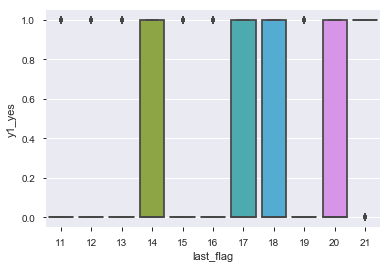

In [74]:
#Bivariate analysis
#box plot
sns.boxplot(x = "last_flag",y = "y1_yes",data = t5_new)
plt.show()

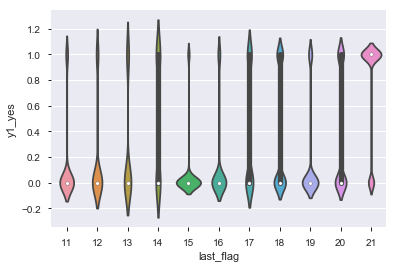

In [75]:
#Bivariate analysis
#violinplot
sns.violinplot(x = "last_flag",y = "y1_yes",data = t5_new)
plt.show()

# Variable reduction using WOE or log(odds)
Identify important variables using WOE or log(odds) comparing with Y
Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


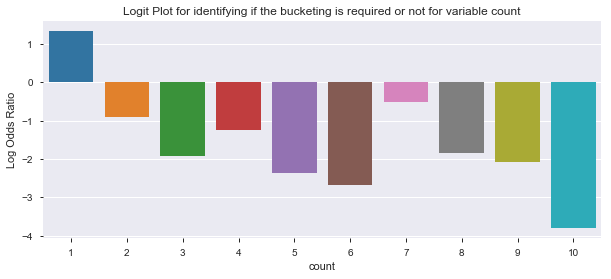

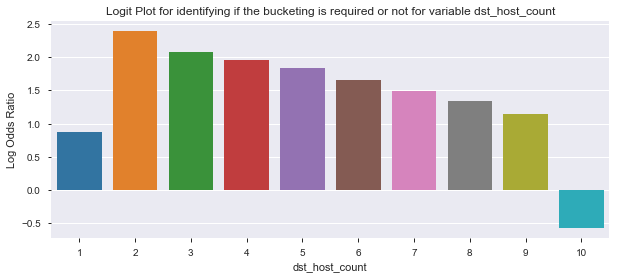

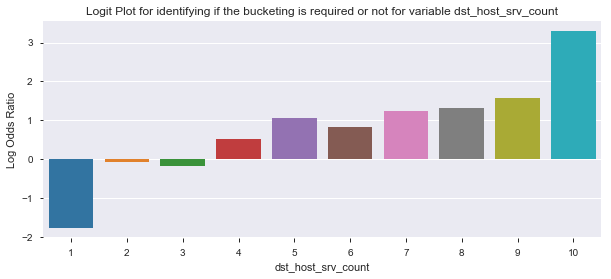

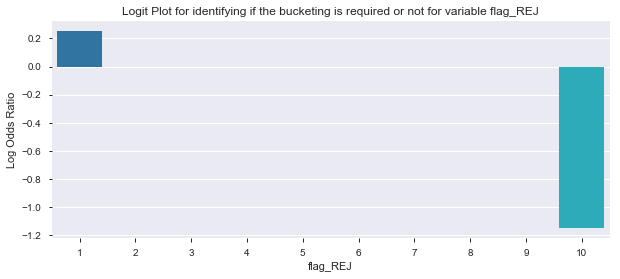

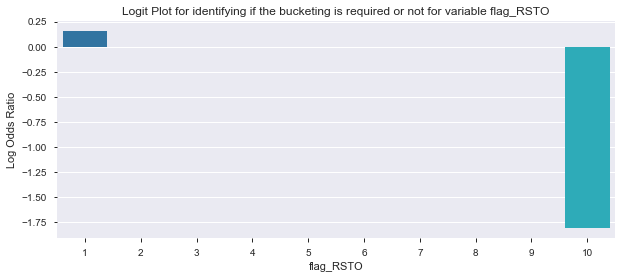

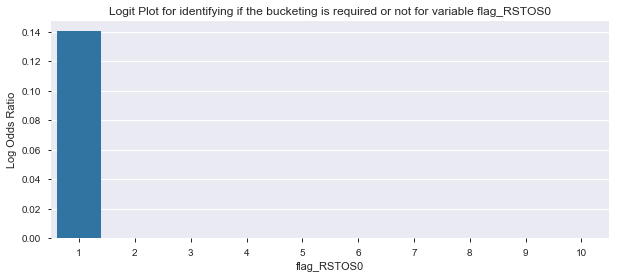

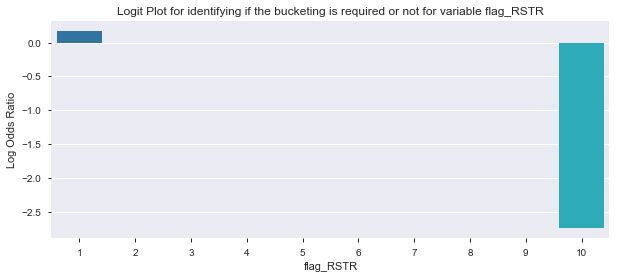

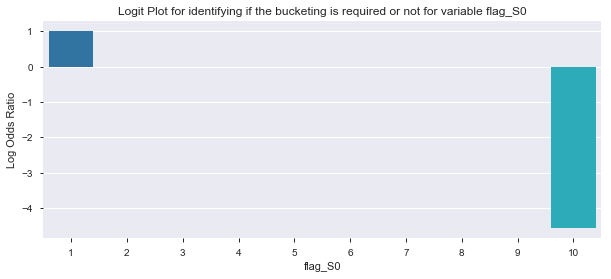

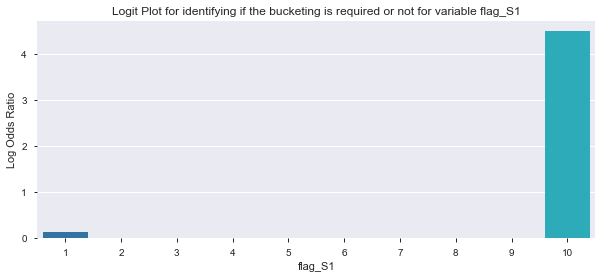

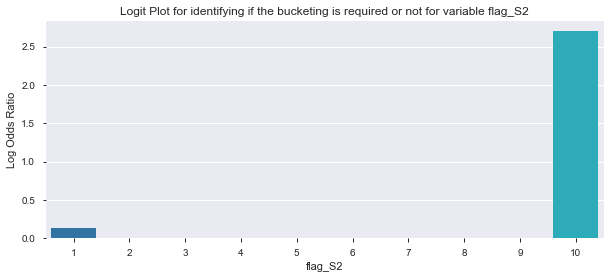

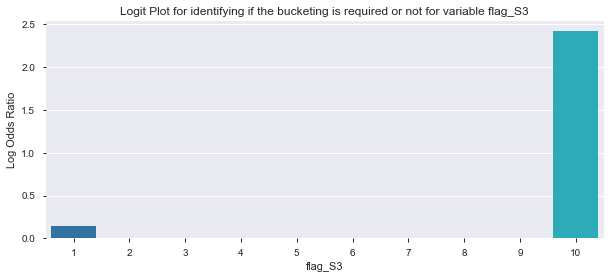

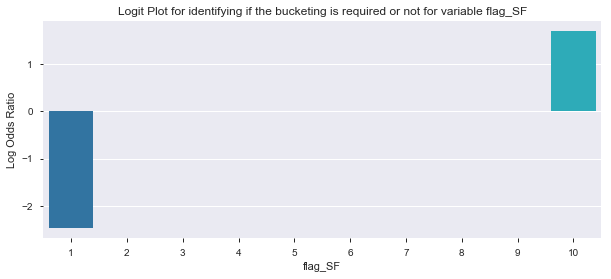

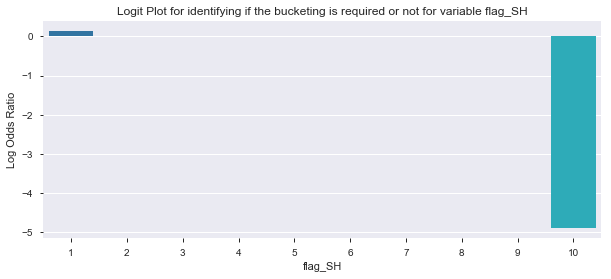

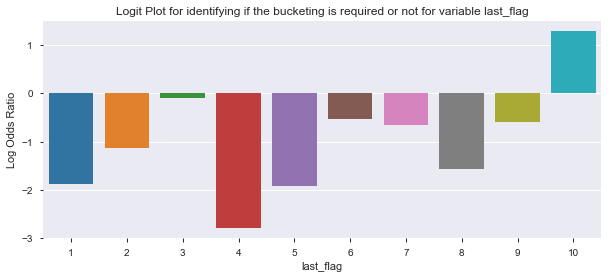

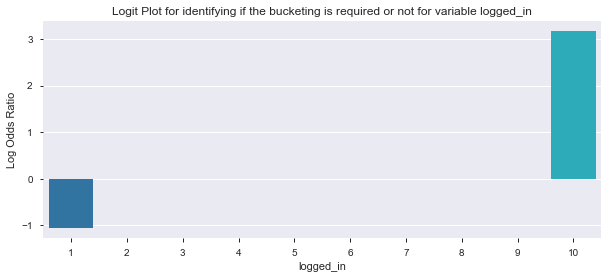

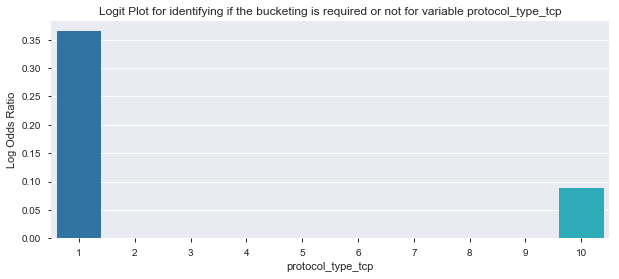

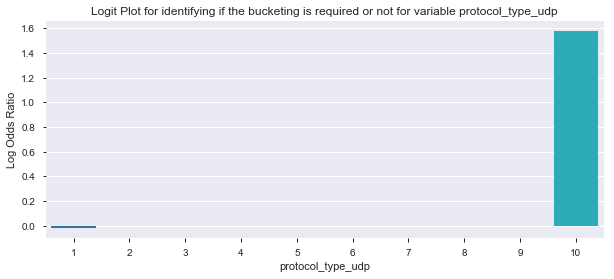

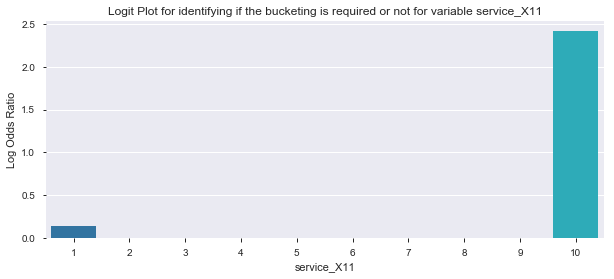

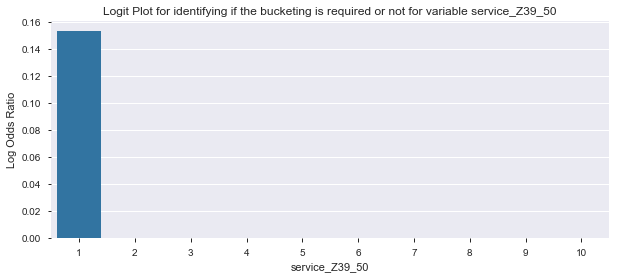

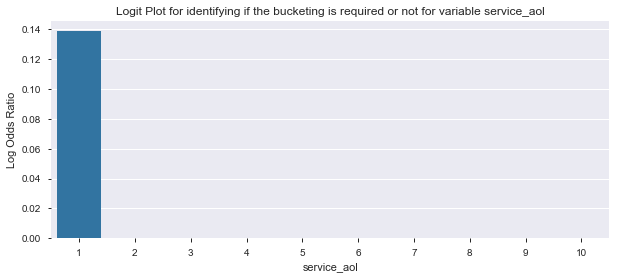

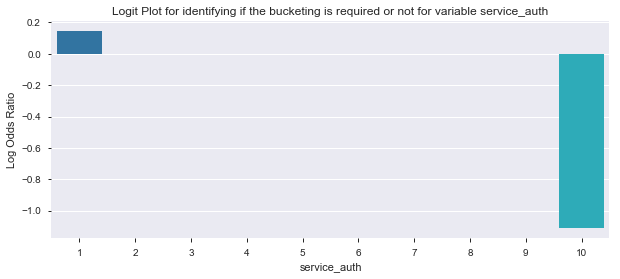

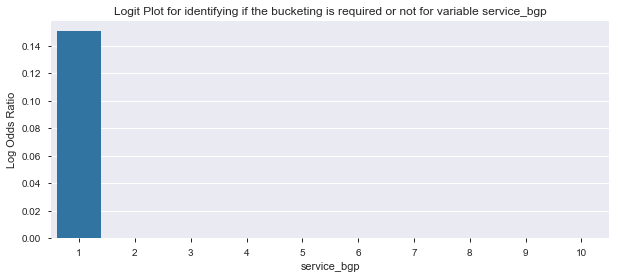

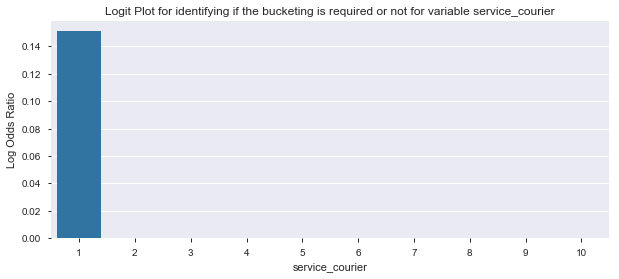

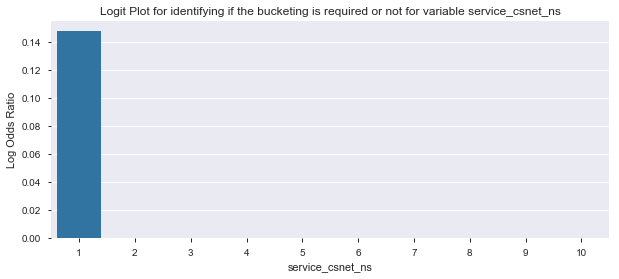

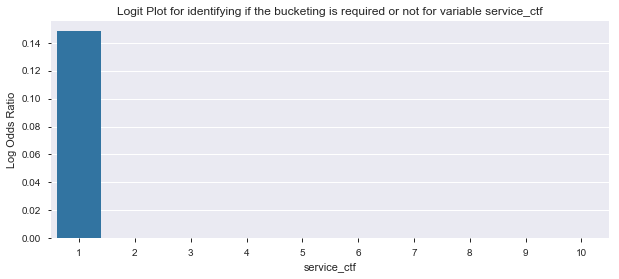

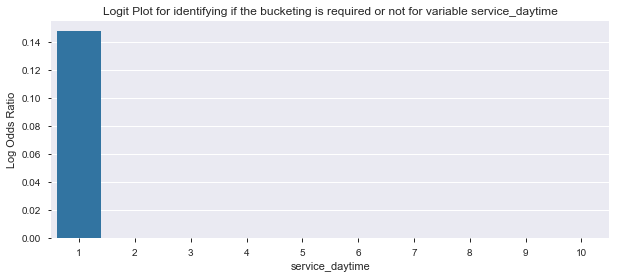

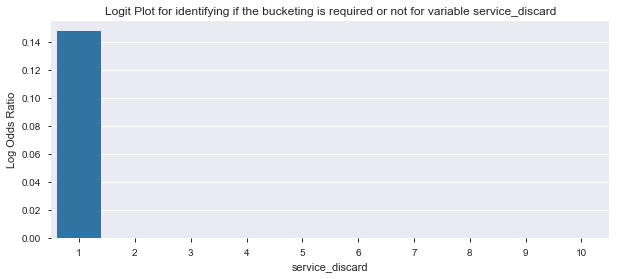

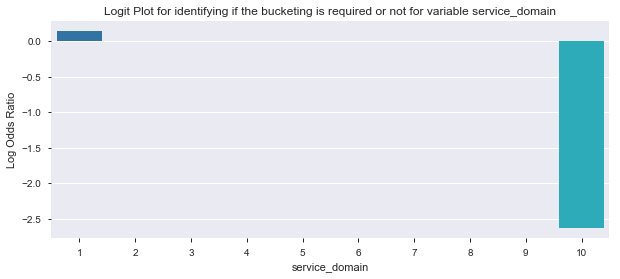

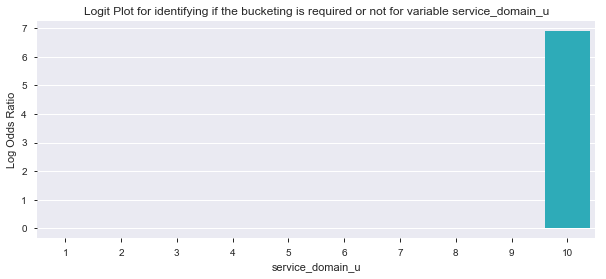

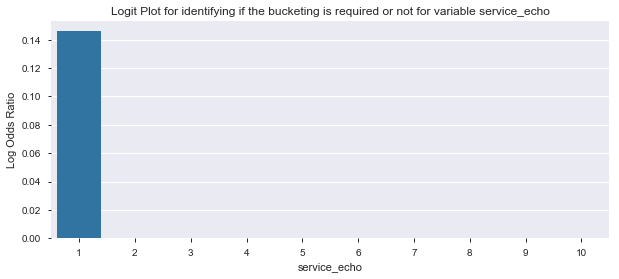

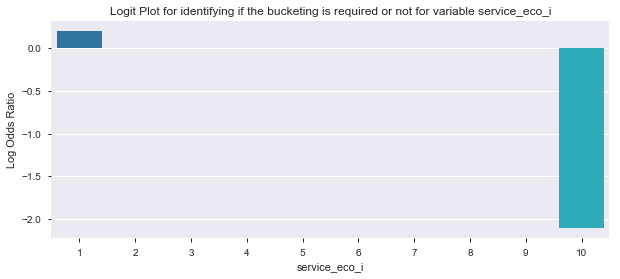

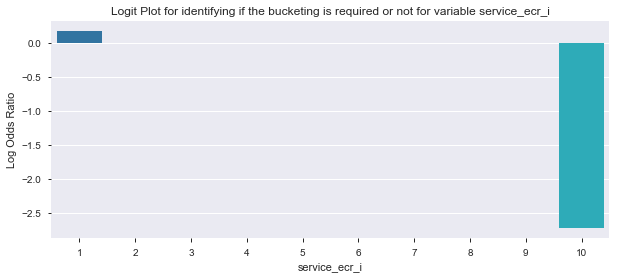

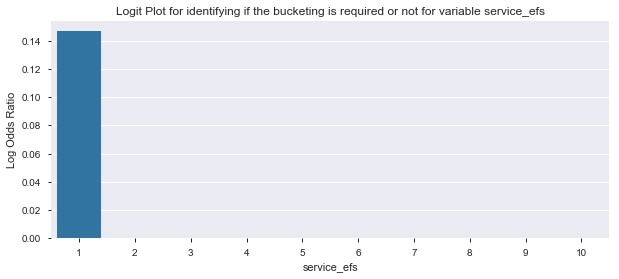

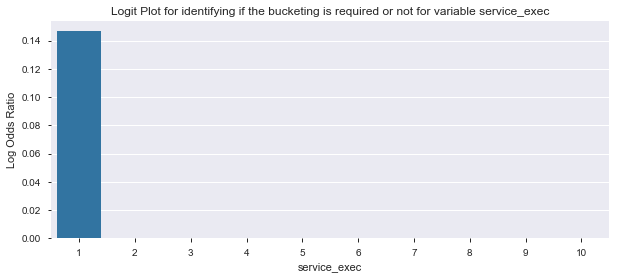

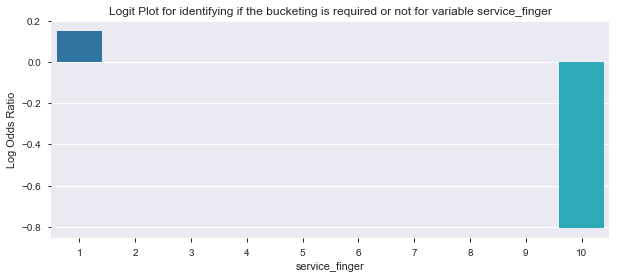

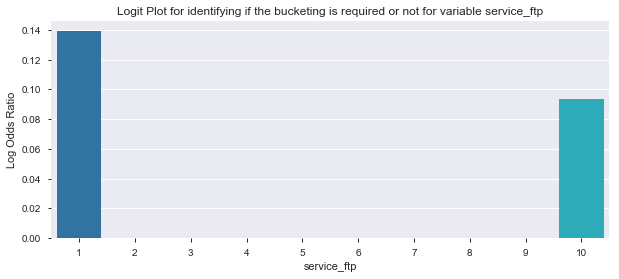

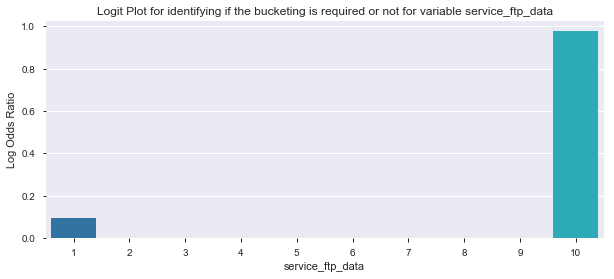

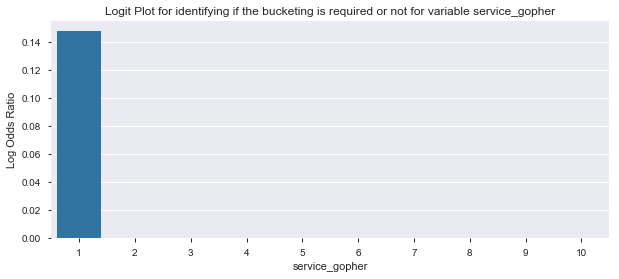

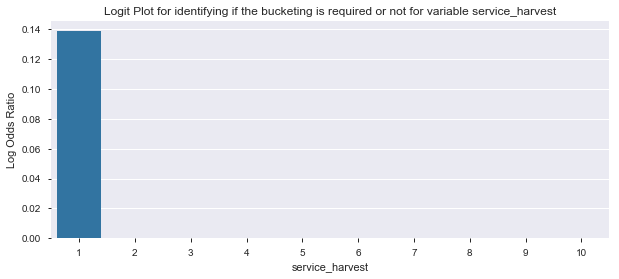

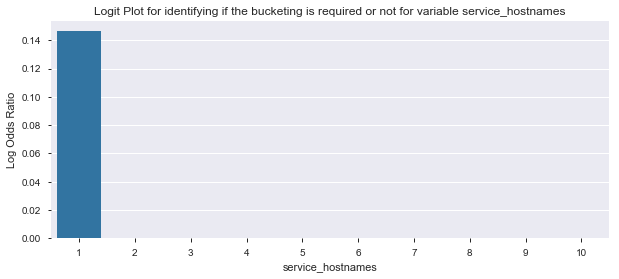

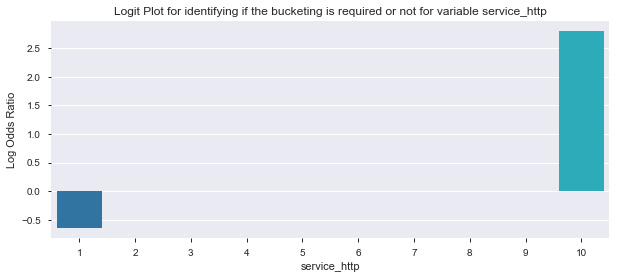

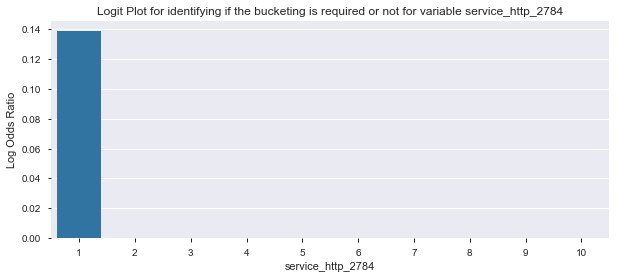

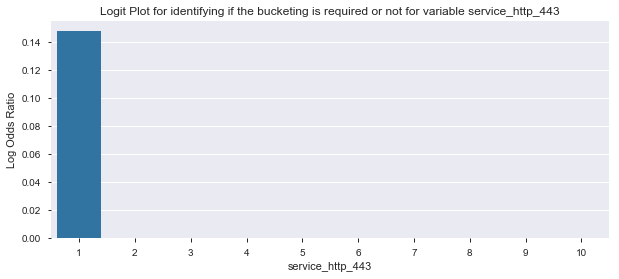

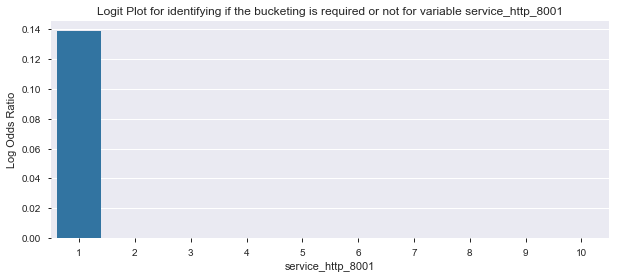

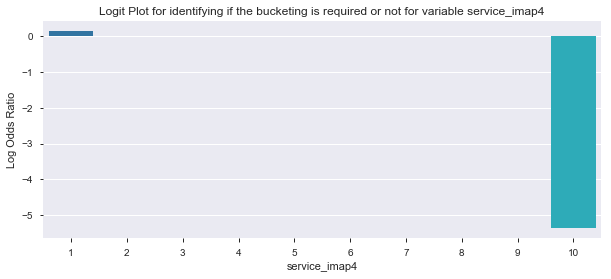

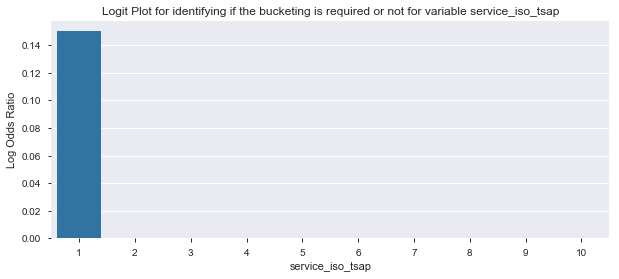

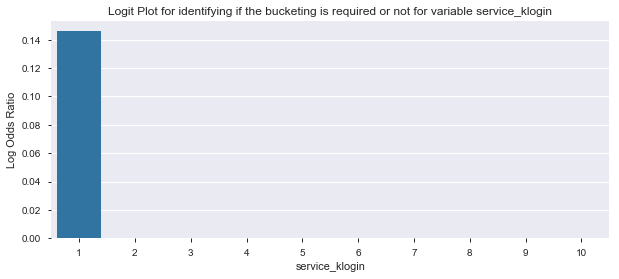

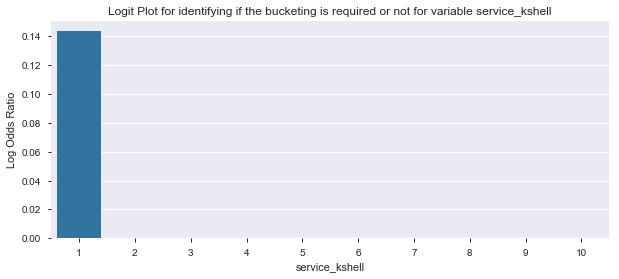

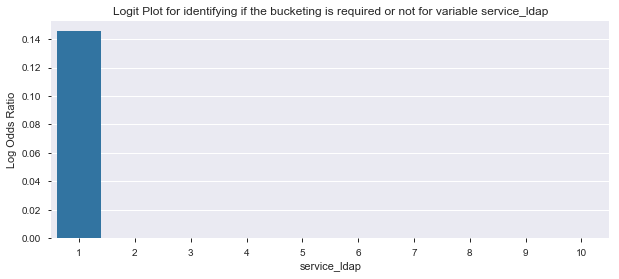

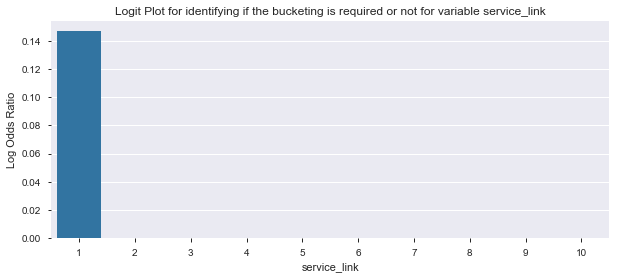

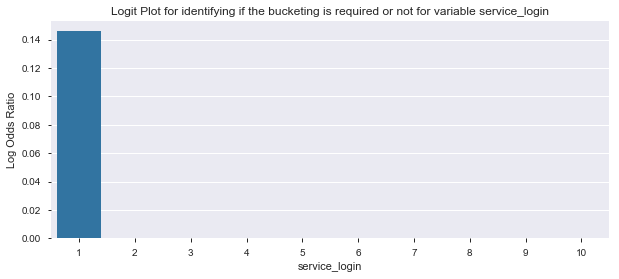

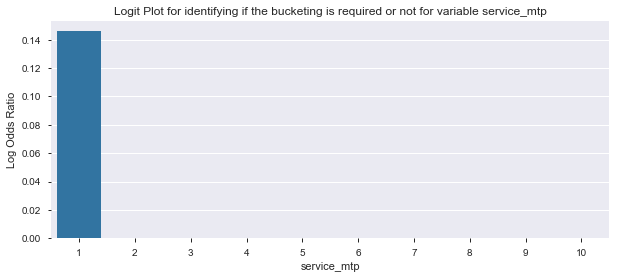

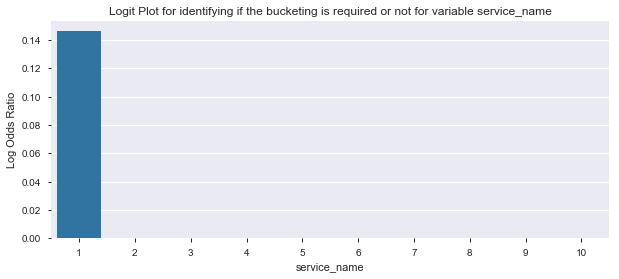

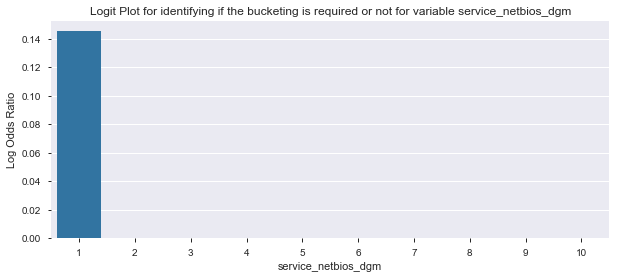

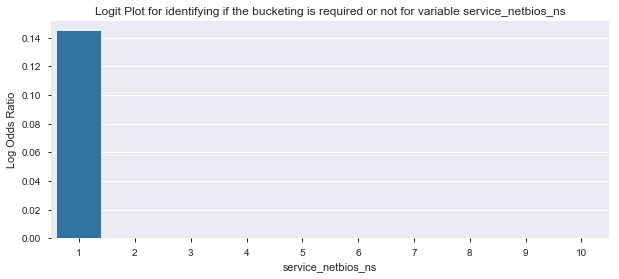

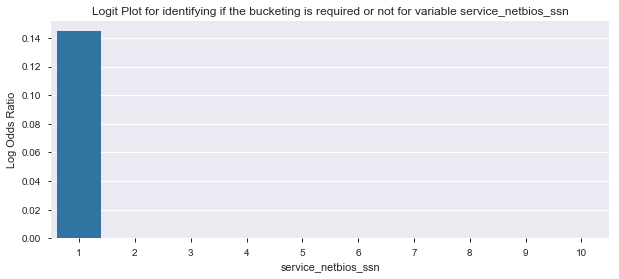

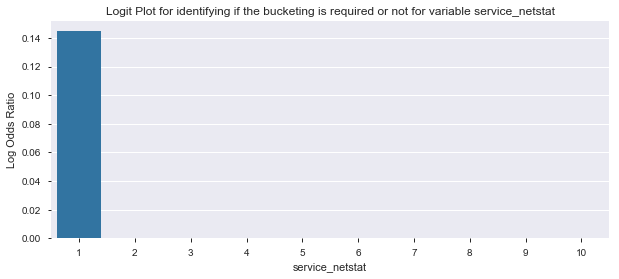

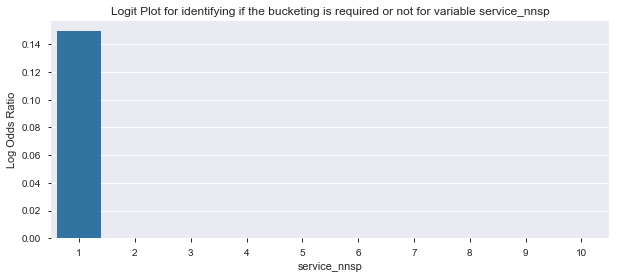

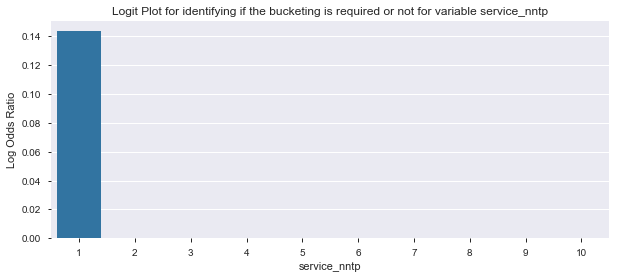

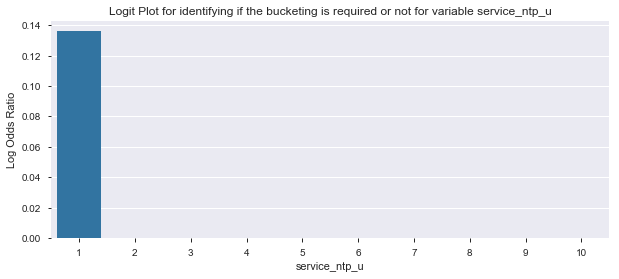

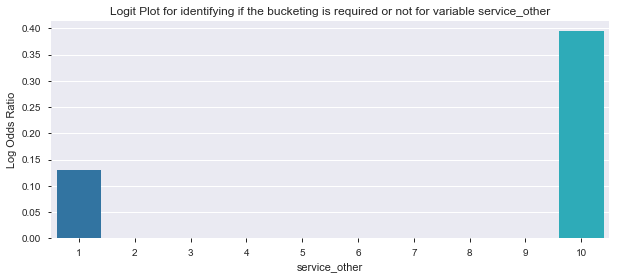

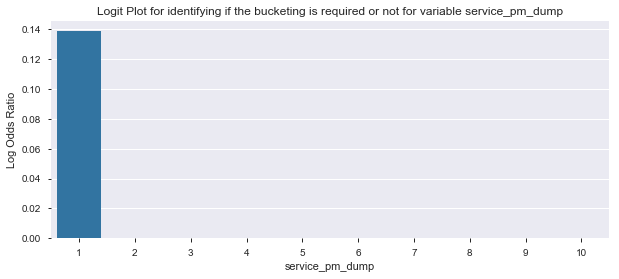

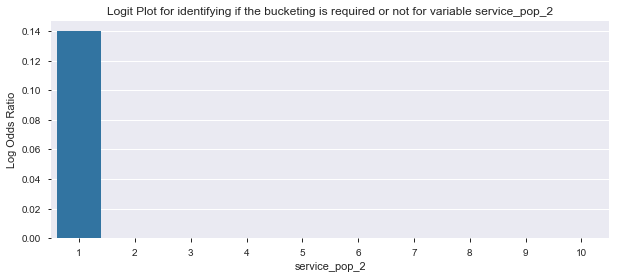

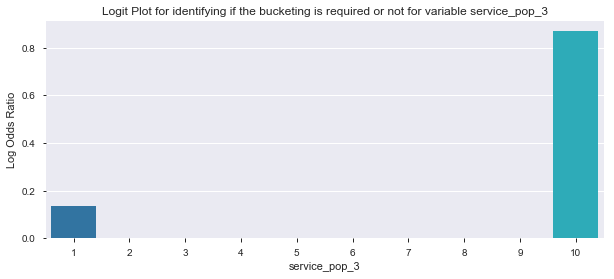

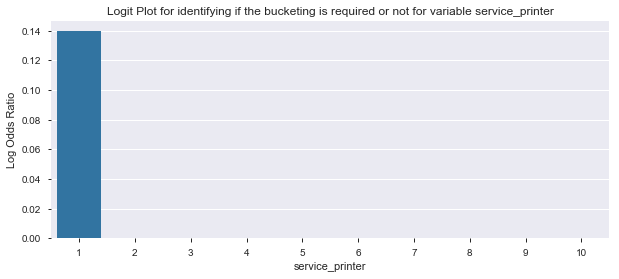

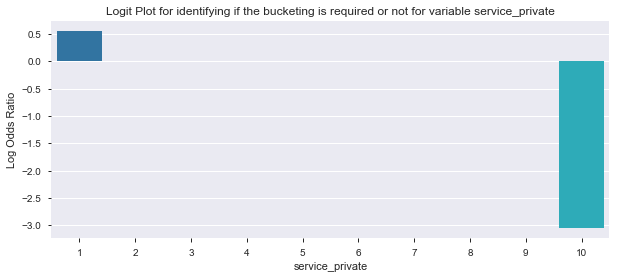

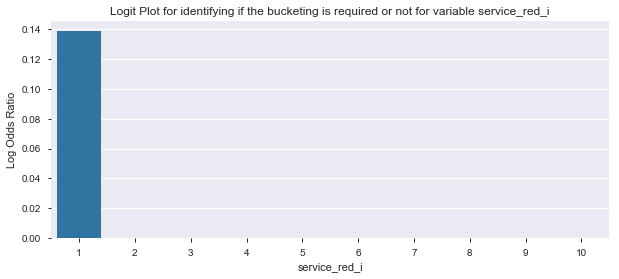

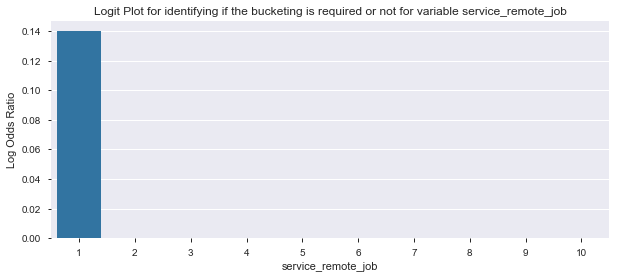

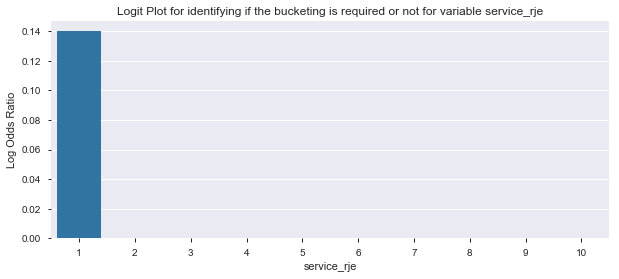

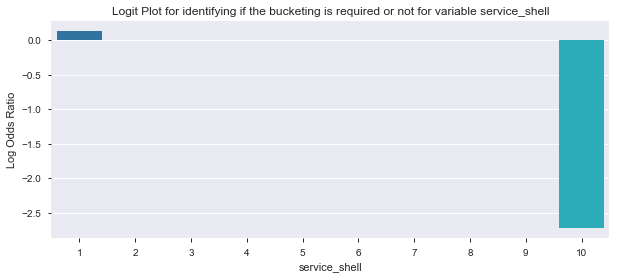

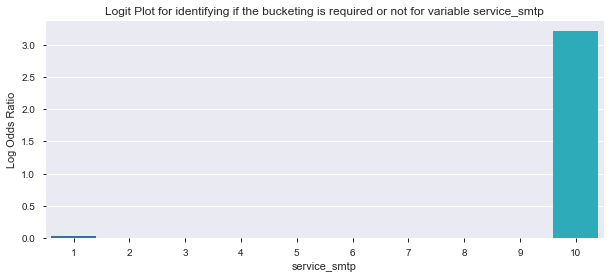

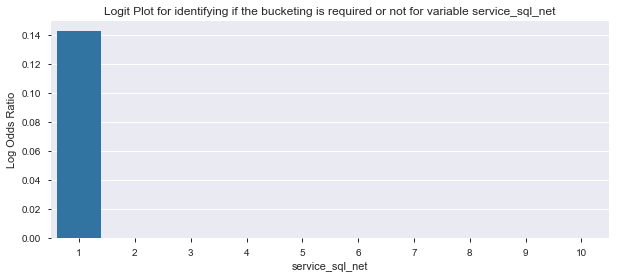

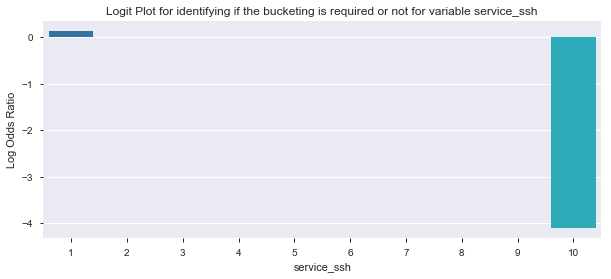

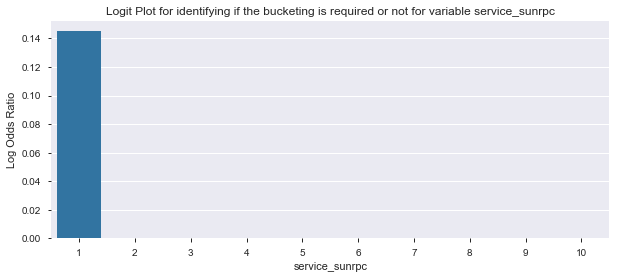

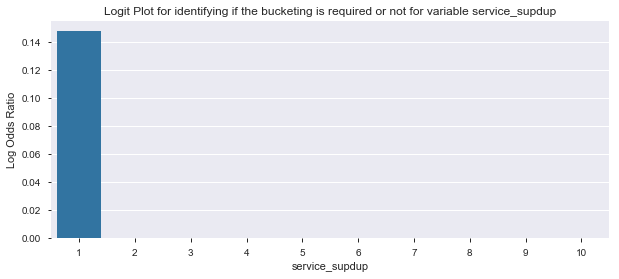

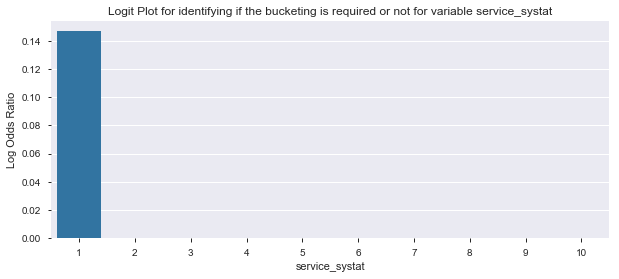

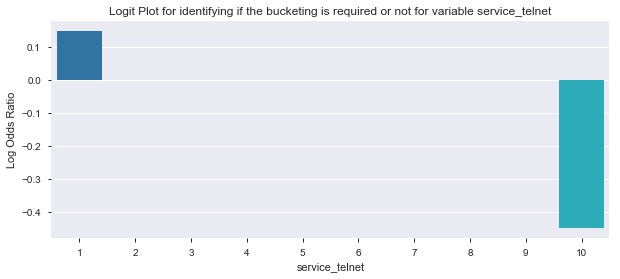

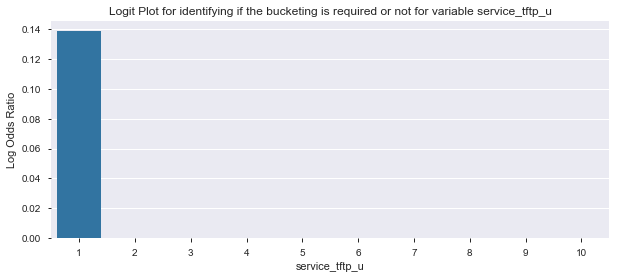

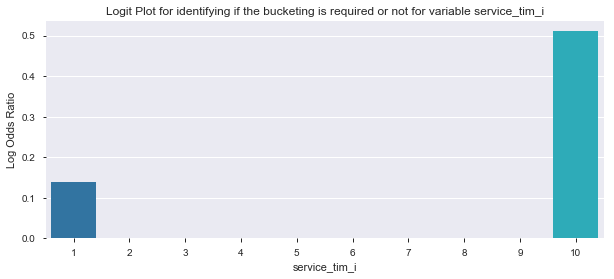

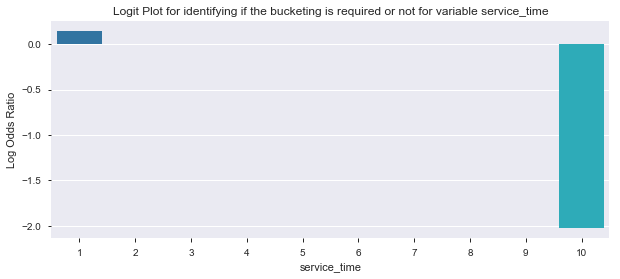

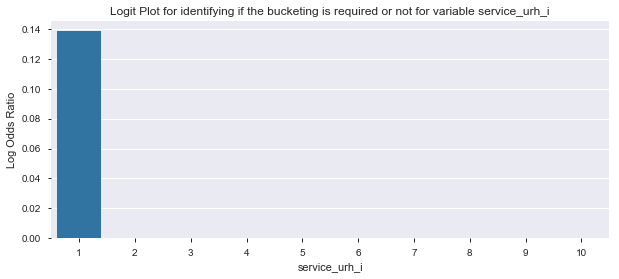

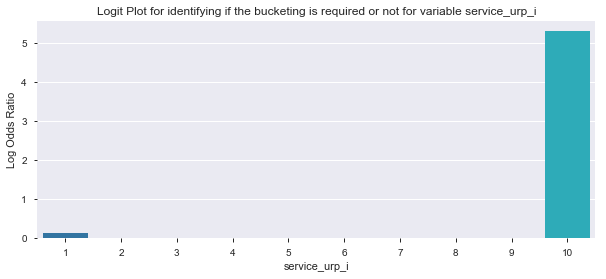

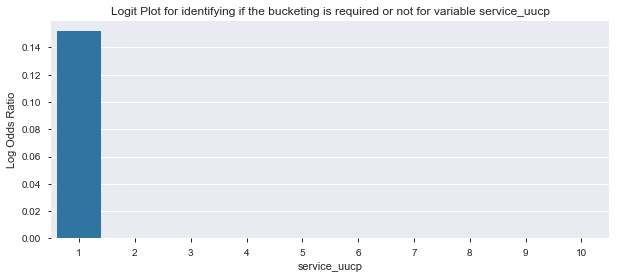

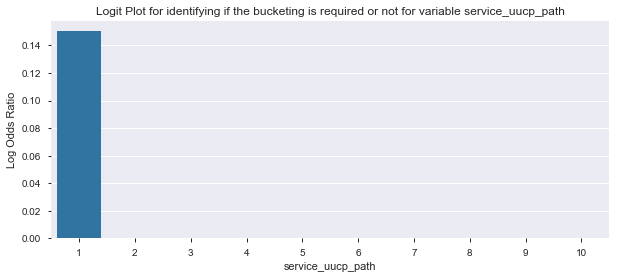

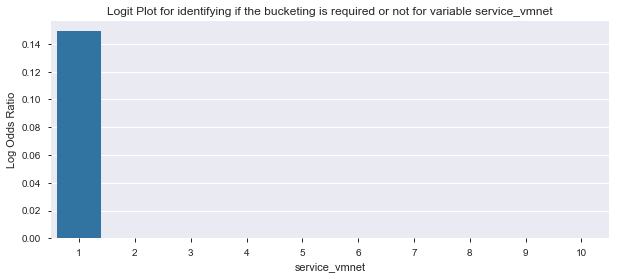

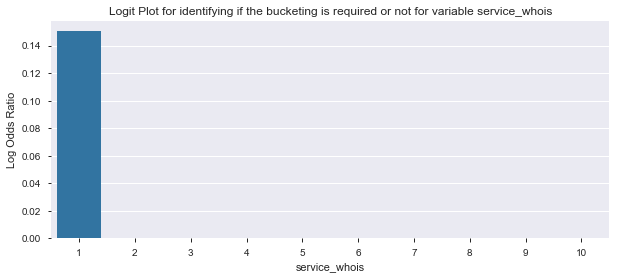

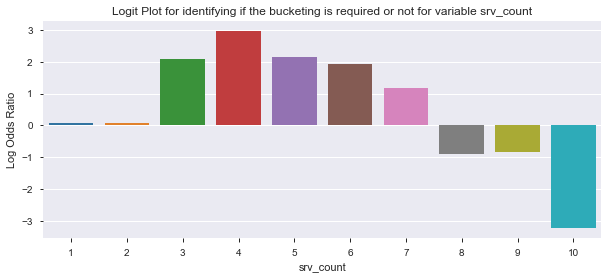

In [76]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in t5_new.columns.difference(['y1_yes']):
    binned = pd.cut(t5_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = t5_new.groupby(binned)['y1_yes'].sum() / (t5_new.groupby(binned)['y1_yes'].count()-t5_new.groupby(binned)['y1_yes'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [77]:
bp

# Variable Reduction using univariate Regression (short list based on Somer's D values)

In [78]:
t5_new.columns

Index(['logged_in', 'count', 'srv_count', 'dst_host_count',
       'dst_host_srv_count', 'last_flag', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
    

In [79]:
import statsmodels.formula.api as sm

In [80]:
logreg_model = sm.logit('y1_yes~logged_in',data = t5_new).fit()

Optimization terminated successfully.
         Current function value: 0.410193
         Iterations 7


In [81]:
logreg_model = sm.logit('y1_yes~count',data = t5_new).fit()

Optimization terminated successfully.
         Current function value: 0.474709
         Iterations 7


In [82]:
logreg_model = sm.logit('y1_yes~flag_REJ',data = t5_new).fit()

Optimization terminated successfully.
         Current function value: 0.673100
         Iterations 5


In [83]:
logreg_model = sm.logit('y1_yes~flag_REJ',data = t5_new).fit()

Optimization terminated successfully.
         Current function value: 0.673100
         Iterations 5


In [84]:
logreg_model = sm.logit('y1_yes~flag_SH',data = t5_new).fit()

Optimization terminated successfully.
         Current function value: 0.689202
         Iterations 9


In [85]:
logreg_model = sm.logit('y1_yes~service_tftp_u',data = t5_new).fit()

         Current function value: 0.690739
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [86]:
logreg_model = sm.logit('y1_yes~service_red_i',data = t5_new).fit()

         Current function value: 0.690714
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [87]:
p = logreg_model.predict(t5_new)

In [88]:
p

0         0.53455
1         0.53455
2         0.53455
3         0.53455
4         0.53455
5         0.53455
6         0.53455
7         0.53455
8         0.53455
9         0.53455
10        0.53455
11        0.53455
12        0.53455
13        0.53455
14        0.53455
15        0.53455
16        0.53455
17        0.53455
18        0.53455
19        0.53455
20        0.53455
21        0.53455
22        0.53455
23        0.53455
24        0.53455
25        0.53455
26        0.53455
27        0.53455
28        0.53455
29        0.53455
           ...   
125942    0.53455
125943    0.53455
125944    0.53455
125945    0.53455
125946    0.53455
125947    0.53455
125948    0.53455
125949    0.53455
125950    0.53455
125951    0.53455
125952    0.53455
125953    0.53455
125954    0.53455
125955    0.53455
125956    0.53455
125957    0.53455
125958    0.53455
125959    0.53455
125960    0.53455
125961    0.53455
125962    0.53455
125963    0.53455
125964    0.53455
125965    0.53455
125966    

In [89]:
metrics.roc_auc_score(t5_new['y1_yes'],p)

0.5000593982952689

In [90]:
2*metrics.roc_auc_score(t5_new['y1_yes'],p)-1

0.00011879659053781744

In [91]:
#import pandas as pd
#import numpy as np
#from patsy import dmatrices
#from sklearn.linear_model import LogisticRegression

#somersd_df = pd.DataFrame()
#for num_variable in Train2.columns.difference(['y1_yes']):
# Prepare the data
     #y,X = dmatrices('y1_yes ~num_variable', data=Train2)
     #y = np.ravel(y)
# Fit the data to Logistic Regression model
#model = LogisticRegression()
#model = model.fit(X,y)

In [92]:
#somersd_df = pd.DataFrame()
#for num_variable in data_new.columns.difference(['y_yes']):
    #logreg = sm.logit(formula = str('y_yes ~ ')+str(num_variable), data=data_new)
    #result = logreg.fit()
    #y_score = pd.DataFrame(result.predict())
    #y_score.columns = ['Score']
    #somers_d = 2*metrics.roc_auc_score(data_new['y_yes'],y_score) - 1
    #temp = pd.DataFrame([num_variable,somers_d]).T
    #temp.columns = ['Variable Name', 'SomersD']
    #somersd_df = pd.concat([somersd_df, temp], axis=0)

In [93]:
t5_new1 =t5_new.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","y1_yes"]]
t5_new1

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,y1_yes
0,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,121,19,255,19,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,166,9,255,9,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,117,16,255,15,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,270,23,255,23,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,133,8,255,13,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,205,12,255,12,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
t5_new1.to_csv("t5_new1.csv")

In [95]:
somersd_df = pd.DataFrame()
for num_variable in t5_new1.columns.difference(['y1_yes']):
    logreg_model = sm.logit(formula = str('y1_yes ~ ')+str(num_variable), data=t5_new1)
    result = logreg_model.fit()
    y1_score = pd.DataFrame(result.predict())
    y1_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(t5_new1['y1_yes'],y1_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)
somersd_df

Optimization terminated successfully.
         Current function value: 0.474709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.615407
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.380610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.673100
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686489
         Iterations 6
         Current function value: 0.690128
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.680424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433832
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690616
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689202
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.593763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.410193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.689334
  

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690742
         Iterations: 35
Optimization terminated successfully.

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.689445
         Iterations 5
         Current function value: 0.686425
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686278
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687434
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687324
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687581
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687477
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.688440
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643951
         Iterations 11
         Current function value: 0.688112
         Iterations: 35
Optimization terminated successfully.

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.675445
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.677667
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.687801
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.687868
         Iterations 23
Optimization terminated successfully.
         Current function value: 0.689271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690750
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.686305
         Iterations 5
         Current function value: 0.687599
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690742
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.687953
         Iterations 28
Optimization terminated successfully.
         Current function value: 0.506475
         Iterations 7
         Current function value: 0.690748
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687526
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690742
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.686966
         Iterations 9
         Current function value: 0.686566
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688118
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688935
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.688259
         Iterations 28
         Current function value: 0.687862
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688143
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688082
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688008
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688289
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688643
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688551
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688563
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.686914
         Iterations 18
         Current function value: 0.688954
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.689918
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.690467
         Iterations 4


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690723
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690280
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.690627
         Iterations 5
         Current function value: 0.690335
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.573118
         Iterations 7
         Current function value: 0.690714
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690280
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690231
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.690483
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.662312
         Iterations 7
         Current function value: 0.689264
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.689071
         Iterations 8
         Current function value: 0.688435
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687440
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687850
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.689951
         Iterations 4
         Current function value: 0.690739
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.690753
         Iterations 4


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.688723
         Iterations 6
         Current function value: 0.690704
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.687898
         Iterations 9
         Current function value: 0.685996
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686553
         Iterations: 35


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.686994
         Iterations 19
         Current function value: 0.686529
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.690752
         Iterations 3


C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Variable Name,SomersD
0,count,0.641607
0,dst_host_count,0.413572
0,dst_host_srv_count,0.784964
0,flag_REJ,0.105669
0,flag_RSTO,0.0196543
0,flag_RSTOS0,0.00175678
0,flag_RSTR,0.0366346
0,flag_S0,0.583128
0,flag_S1,0.00529247
0,flag_S2,0.00163065


In [96]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [97]:
somersd_df

,Variable Name,SomersD
0,dst_host_srv_count,0.784964
0,flag_SF,0.744312
0,logged_in,0.676629
0,count,0.641607
0,flag_S0,0.583128
0,service_http,0.52597
0,last_flag,0.525789
0,dst_host_count,0.413572
0,service_private,0.341396
0,protocol_type_udp,0.140993


In [98]:
somersd_df.to_csv('Univariate Regression Results.csv')

# Variable Reduction using Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [99]:
t5_new2 =t5_new.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","y1_yes"]]
t5_new2.head()

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,y1_yes
0,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,121,19,255,19,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
t5_new2.to_csv("t5_new2.csv")

In [101]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = t5_new2[t5_new2.columns.difference(['y1_yes'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, t5_new2[['y1_yes']] )

print(rfe.support_)
print(rfe.ranking_)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\li

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

[False False False  True  True  True  True  True False False False False
  True False False False False False False False False False False False
 False False False False  True False  True  True False False False False
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False False False False False  True  True False
 False False False]
[62 69 68  1  1  1  1  1 40 48 49 52  1 51 57 43 55 36  2 70 59  5  8 16
 12 33 25 60  1 30  1  1 21 29 46 54 47  1 72 20  1 73 14 71  3  9 31 34
 26 17  6 24 18 27 28 15 35 10 13 53 44 66 37 58 38  1 64 42 41 56  1 32
 39 19 22 23 45 50 67 61 65  1  1  4 11  7 63]


In [102]:
X.columns

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'last_flag', 'logged_in',
       'protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_ne

In [103]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [104]:
RFE_features

Index(['flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_SH', 'service_domain_u', 'service_eco_i', 'service_ecr_i',
       'service_gopher', 'service_http', 'service_private', 'service_smtp',
       'service_urp_i', 'service_uucp'],
      dtype='object')

# Variable reduction using Select K-Best technique

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [106]:
X = t5_new2[t5_new2.columns.difference(['y1_yes'])]
X_new = SelectKBest(f_classif, k=15).fit(X, t5_new2[['y1_yes']] )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
X_new.get_support()

array([ True,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [108]:
X_new.scores_

array([6.26884673e+04, 2.06198087e+04, 1.37605839e+05, 4.46148376e+03,
       9.96492655e+02, 1.18511386e+02, 2.27184161e+03, 9.22603796e+04,
       3.04601678e+02, 8.28019239e+01, 2.90257642e+01, 1.68329283e+05,
       3.04113887e+02, 2.46145858e+04, 1.14591302e+05, 3.56595433e+02,
       6.23625227e+03, 4.31296064e+01, 1.00484494e+03, 2.29722763e+00,
       3.20403824e+02, 8.25484477e+02, 8.53741938e+02, 6.31846558e+02,
       6.52917217e+02, 6.03772651e+02, 6.23655939e+02, 5.04733268e+02,
       9.05255433e+03, 5.02198845e+02, 3.57323051e+03, 2.89932045e+03,
       5.61705245e+02, 5.48861703e+02, 3.69453067e+02, 8.97431524e-01,
       1.08300713e+03, 6.00265043e+02, 2.29722763e+00, 5.32522403e+02,
       5.82515865e+04, 1.14859423e+00, 6.14297648e+02, 2.29722763e+00,
       7.38365196e+02, 7.98426376e+02, 5.01033095e+02, 3.45184179e+02,
       4.74231907e+02, 5.50029097e+02, 4.96370498e+02, 5.08028194e+02,
       5.22022720e+02, 4.68408364e+02, 4.00928281e+02, 4.18367148e+02,
      

In [109]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [110]:
KBest_features

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_udp',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private', 'service_smtp'],
      dtype='object')

# Variance Inflation Factor assessment

In [111]:
X = pd.concat([t5_new2[t5_new2.columns.difference(['y1_yes'])],t5_new2['y1_yes']], axis=1)
features = "+".join(t5_new2.columns.difference(['y1_yes']))
X.head()

,count,dst_host_count,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_count,y1_yes
0,13,255,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,123,255,26,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
2,5,30,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
3,30,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,1
4,121,255,19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,0


In [112]:
X.to_csv("X.csv")

In [113]:
features

'count+dst_host_count+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+last_flag+logged_in+protocol_type_tcp+protocol_type_udp+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_gopher+service_harvest+service_hostnames+service_http+service_http_2784+service_http_443+service_http_8001+service_imap4+service_iso_tsap+service_klogin+service_kshell+service_ldap+service_link+service_login+service_mtp+service_name+service_netbios_dgm+service_netbios_ns+service_netbios_ssn+service_netstat+service_nnsp+service_nntp+service_ntp_u+service_other+service_pm_dump+service_pop_2+service_pop_3+service_printer+service_private+service_red_i+service_remote_job+service_rje+service_shell+service_smtp+service_sql_n

In [114]:
a,b = dmatrices(formula_like='y1_yes ~ '+ 'service_private+last_flag+flag_REJ+dst_host_srv_count+dst_host_count+ service_uucp+ service_smtp+ service_ecr_i+ service_eco_i+ flag_RSTR+ flag_RSTOS0+ flag_RSTO+ service_urp_i+service_gopher+service_domain_u+flag_SH', data = t5_new2, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor            features
0   125.976387           Intercept
1     1.303091     service_private
2     1.389484           last_flag
3     1.073933            flag_REJ
4     1.620618  dst_host_srv_count
5     1.377659      dst_host_count
6     1.033748        service_uucp
7     1.056829        service_smtp
8     1.055164       service_ecr_i
9     1.278882       service_eco_i
10    1.120827           flag_RSTR
11    1.002523         flag_RSTOS0
12    1.040338           flag_RSTO
13    1.011356       service_urp_i
14    1.010460      service_gopher
15    1.175184    service_domain_u
16    1.012218             flag_SH


# Final list of variable selected for the model building from above steps
dst_host_count,
last_flag,
service_private,
flag_SH,
service_gopher,
service_urp_i,
flag_RSTOS0,
flag_RSTR,
service_ecr_i,
service_uucp,
service_smtp,
dst_host_srv_count,
flag_REJ,
protocol_type_udp

# Model Building

In [115]:
#for logistic regression using statsmodels
train10, test10 = train_test_split(t5_new2, test_size=0.3, random_state=0)

In [116]:
'''
list_vars = list(RFE_features)

all_columns = "+".join(list_vars)
my_formula = "y_yes~" + all_columns

print(my_formula)
'''

'\nlist_vars = list(RFE_features)\n\nall_columns = "+".join(list_vars)\nmy_formula = "y_yes~" + all_columns\n\nprint(my_formula)\n'

In [117]:
import statsmodels.formula.api as sm
import sklearn.metrics as metrics

In [118]:
logreg = sm.logit(formula='y1_yes ~ service_private+last_flag+flag_REJ+dst_host_srv_count+dst_host_count+ service_smtp+ service_ecr_i+ service_eco_i+flag_RSTO+ service_urp_i+service_domain_u', data = train10)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.168168
         Iterations 11


In [119]:
print(result.summary2())

                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.757     
Dependent Variable:   y1_yes           AIC:              29682.0239
Date:                 2019-08-20 20:12 BIC:              29794.6696
No. Observations:     88180            Log-Likelihood:   -14829.   
Df Model:             11               LL-Null:          -60916.   
Df Residuals:         88168            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       11.0000                                      
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -8.8604   0.1532 -57.8217 0.0000 -9.1607 -8.5601
service_private    -2.8075   0.0526 -53.4048 0.0000 -2.9105 -2.7044
last_flag           0.5978   0.0087  68.5585 0.0000  0.5807  0.6149
flag_RE

# Accuracy Metrics

In [120]:
train_gini = 2*metrics.roc_auc_score(train10['y1_yes'], result.predict(train10)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test10['y1_yes'], result.predict(test10)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train10['y1_yes'], result.predict(train10))
test_auc = metrics.roc_auc_score(test10['y1_yes'], result.predict(test10))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9565209059934796
The Gini Index for the model built on the Test Data is :  0.9553423159776393
The AUC for the model built on the Train Data is :  0.9782604529967398
The AUC for the model built on the Test Data is :  0.9776711579888197


In [121]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train10))
train_predicted_prob.columns = ['prob']
train_actual = train10['y1_yes']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
81433,1,0.966982
15397,0,0.444702
49130,1,0.999698
114911,1,0.990014
50858,0,0.068675


In [122]:
train_predict.to_csv("train_predict.csv")

In [123]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test10))
test_predicted_prob.columns = ['prob']
test_actual = test10['y1_yes']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
11224,0,0.002939
13951,0,0.025988
62642,1,0.996573
78373,0,0.030408
22304,0,0.023334


In [124]:
test_predict.to_csv("test_predict.csv")

In [125]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [126]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.534157
0,0.020408,0.989533,0.256366,0.647993
0,0.040816,0.985415,0.492599,0.755840
0,0.061224,0.982209,0.549905,0.780823
0,0.081633,0.979428,0.612688,0.808585
0,0.102041,0.977347,0.674424,0.836233
0,0.122449,0.975033,0.715298,0.854037
0,0.142857,0.972613,0.745362,0.866750
0,0.163265,0.971126,0.771045,0.877920
0,0.183673,0.968197,0.815400,0.897017


In [127]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [128]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.534157,1.000000
0,0.020408,0.989533,0.256366,0.647993,1.245899
0,0.040816,0.985415,0.492599,0.755840,1.478014
0,0.061224,0.982209,0.549905,0.780823,1.532114
0,0.081633,0.979428,0.612688,0.808585,1.592116


In [129]:
roc_like_df.to_csv("roc_like_df.csv")

In [130]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc1=roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]
roc1

,cutoff,sensitivity,specificity,accuracy,total
0,0.367347,0.932912,0.970106,0.950238,1.903017


In [131]:
roc1.to_csv("roc1.csv")

In [132]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc2=roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]
roc2

,cutoff,sensitivity,specificity,accuracy,total
0,0.367347,0.932912,0.970106,0.950238,1.903017


In [133]:
roc2.to_csv("roc2.csv")

In [134]:
#Cut-off based on highest sensitivity
roc3=roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]
roc3

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.534157,1.0


In [135]:
roc3.to_csv("roc3.csv")

In [136]:
#Choosen Best Cut-off is 0.367347 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.367347 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.367347 else 0)

In [137]:
test_predict.head()

,actual,prob,predicted
11224,0,0.002939,0
13951,0,0.025988,0
62642,1,0.996573,1
78373,0,0.030408,0
22304,0,0.023334,0


In [138]:
train_predict.head()

,actual,prob,predicted
81433,1,0.966982,1
15397,0,0.444702,1
49130,1,0.999698,1
114911,1,0.990014,1
50858,0,0.068675,0


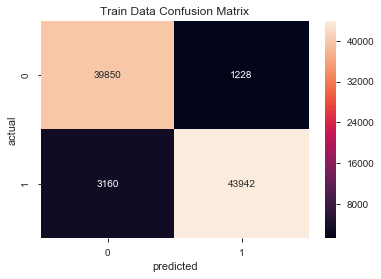

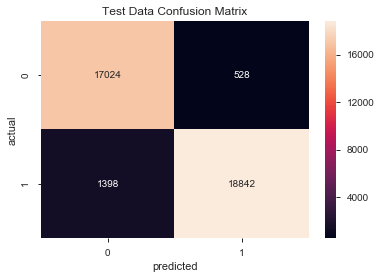

In [139]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [140]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9502381492401906
The overall accuracy score for the Test Data  is :  0.94903683319221


In [141]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     41078
           1       0.97      0.93      0.95     47102

   micro avg       0.95      0.95      0.95     88180
   macro avg       0.95      0.95      0.95     88180
weighted avg       0.95      0.95      0.95     88180



In [142]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     17552
           1       0.97      0.93      0.95     20240

   micro avg       0.95      0.95      0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792



In [143]:
### Decile Analysis

#Decile analysis
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


#Decile analysis for validation of models - Business validation

In [144]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

train_predict.head()

,actual,prob,predicted,Deciles
81433,1,0.966982,1,5
15397,0,0.444702,1,4
49130,1,0.999698,1,8
114911,1,0.990014,1,6
50858,0,0.068675,0,2


In [145]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
11224,0,0.002939,0,0
13951,0,0.025988,0,1
62642,1,0.996573,1,7
78373,0,0.030408,0,2
22304,0,0.023334,0,1


In [146]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [147]:
Decile_analysis_train1 = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train1.columns = ['max_prob','min_prob','#1','#0','total']

In [148]:
Decile_analysis_train1

,max_prob,min_prob,#1,#0,total
Deciles,,,,,
9,0.999999,0.999853,8774.0,0.0,8774
8,0.999853,0.999548,8861.0,0.0,8861
7,0.999548,0.994465,8799.0,16.0,8815
6,0.994460,0.989580,8808.0,13.0,8821
5,0.989578,0.523130,8057.0,762.0,8819
4,0.522950,0.185428,2302.0,6502.0,8804
3,0.185365,0.084115,522.0,8159.0,8681
2,0.084026,0.030211,375.0,8346.0,8721
1,0.030203,0.012151,207.0,8831.0,9038


In [149]:
# Decile Analysis for train data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test1 = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test1.columns = ['max_prob','min_prob','#1','#0','total']

In [150]:
Decile_analysis_test1

,max_prob,min_prob,#1,#0,total
Deciles,,,,,
9,0.999999,0.999851,3738.0,0.0,3738
8,0.999851,0.999520,3815.0,0.0,3815
7,0.999519,0.994256,3773.0,10.0,3783
6,0.994252,0.989997,3777.0,4.0,3781
5,0.989991,0.538366,3462.0,317.0,3779
4,0.537547,0.185693,1000.0,2756.0,3756
3,0.185365,0.084034,237.0,3524.0,3761
2,0.084026,0.030271,167.0,3565.0,3732
1,0.030203,0.012117,117.0,3750.0,3867


In [151]:
Decile_analysis_train1.to_csv('Decile_analysis_train1.csv')

Decile_analysis_test1.to_csv('Decile_analysis_test1.csv')

#Exercise
#you need to come up with the similar metrics for train & test as per the template
# you need to compare Bad rate, lift, KS, Rank ordering for train & test decile analysis

# Saving as pickle objects for future use

# Lets save everything in metrics df to pickle object.

In [152]:
import pickle

In [153]:
# now you can save it to a file
with open('result.pkl', 'wb') as f:
    pickle.dump(result, f)

In [154]:
# and later you can load it
with open('result.pkl', 'rb') as f:
    result = pickle.load(f)